# Problem 1:

## You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.



## Data Ingestion

### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. 

Read the dataset

In [15]:
#import requrired libraries
import numpy as np
import pandas as pd

In [16]:
#load the dataset
df = pd.read_excel('Election_Data.xlsx',sheet_name = 'Election_Dataset_Two Classes')

In [17]:
#Print top 5 rows
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [18]:
#Information of Variables and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


Inference:
1. All the variables except vote and gender are int64 datatypes.
2. Except age remaining variables looks like categorical columns.

In [19]:
#Shape of the dataset
df.shape

(1525, 10)

Inference:
1. The dataset has 1525 rows and 10 columns.

In [20]:
#removing or dropping unwanted variable
df.drop(columns = 'Unnamed: 0',inplace = True)

In [21]:
#check for skewness 
print(df.skew())

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_9420\3517913859.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.skew())


In [22]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


Null value condition check

In [23]:
#checking for null values
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

Inference :
1. There are no null values present.

In [24]:
#checking for duplicate values
df.duplicated().sum()

8

In [233]:
#dropping duplicate values
df.drop_duplicates(inplace=True)

In [234]:
df.duplicated().sum()

0

Inference :
1. There are 8 duplicates presented in the dataset and they should be removed.

#### Descriptive Statistics

In [235]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1517,2,Labour,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1517.0,NaN,NaN,NaN,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,5.0,3.0,604.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
economic.cond.household,1517.0,5.0,3.0,645.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blair,1517.0,5.0,4.0,833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hague,1517.0,5.0,2.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Europe,1517.0,11.0,11.0,338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
political.knowledge,1517.0,4.0,2.0,776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1517,2,female,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#converting necessary variables into object
df[['economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']] = df[['economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']].astype('object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   object
 3   economic.cond.household  1517 non-null   object
 4   Blair                    1517 non-null   object
 5   Hague                    1517 non-null   object
 6   Europe                   1517 non-null   object
 7   political.knowledge      1517 non-null   object
 8   gender                   1517 non-null   object
dtypes: int64(1), object(8)
memory usage: 118.5+ KB


In [30]:
#checking descriptive statistics again
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1517,2,Labour,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1517.0,NaN,NaN,NaN,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,5.0,3.0,604.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
economic.cond.household,1517.0,5.0,3.0,645.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blair,1517.0,5.0,4.0,833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hague,1517.0,5.0,2.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Europe,1517.0,11.0,11.0,338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
political.knowledge,1517.0,4.0,2.0,776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1517,2,female,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Inference :
1. Rest of all the columns has object variables with ‘Europe’ being highest having 11 unique values
2. The mean and median for the only integer column ‘age’ is almost same indicating the column is normally distributed.
3. ‘vote’ have two unique values Labour and Conservative, which is also a dependent variable.
4. ‘gender’ has two unique values male and female.
5. We can come to a conclusion that the dataset has only one integer column which is ’age’

### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. 

1. Univariate Analysis and Outlier Check

In [232]:
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

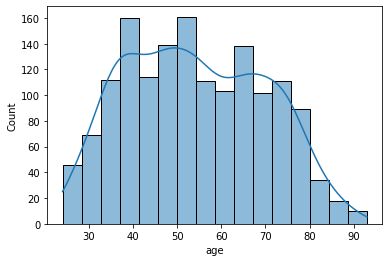

In [32]:
sns.histplot(data=df, x='age', kde=True);

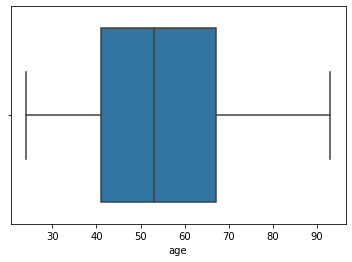

In [40]:
# creating a boxplot with seaborn
sns.boxplot(data=df, x='age');

Inference:
1. ‘age’ is the only integer variable and it is not having outliers.
2. Also, the dist. plot shows that
the variable is normally distributed.

1.1 Frequency distribution of the categorical variables.

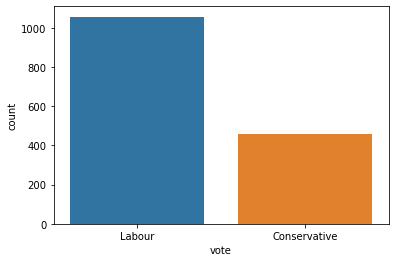

In [41]:
sns.countplot(data=df, x='vote');

Inference:
1. There are large number of voters in labour.

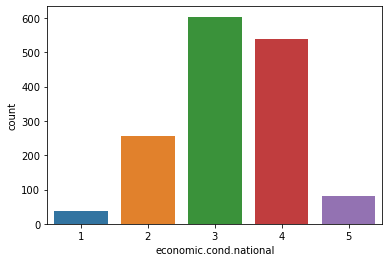

In [42]:
sns.countplot(data=df, x='economic.cond.national');

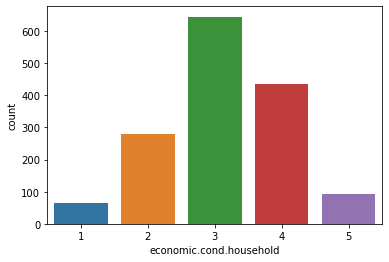

In [43]:
sns.countplot(data=df, x='economic.cond.household');

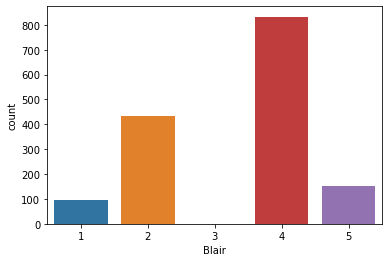

In [44]:
sns.countplot(data=df, x='Blair');

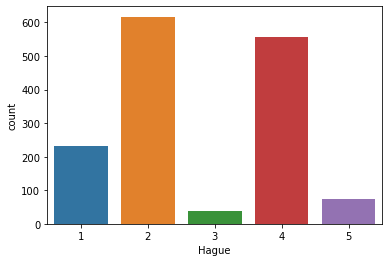

In [45]:
sns.countplot(data=df, x='Hague');

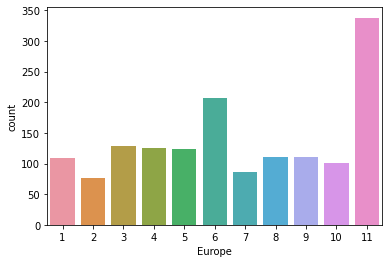

In [46]:
sns.countplot(data=df, x='Europe');

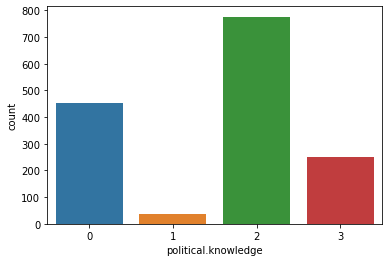

In [47]:
sns.countplot(data=df, x='political.knowledge');

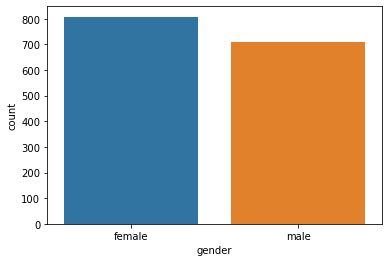

In [48]:
sns.countplot(data=df, x='gender');

Inference:
 There are large number of female voters than male voters according to gender.

Bivariate Analysis

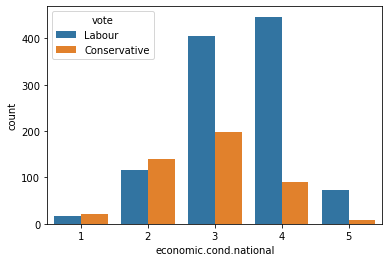

In [51]:
sns.countplot(data=df, x='economic.cond.national', hue='vote');

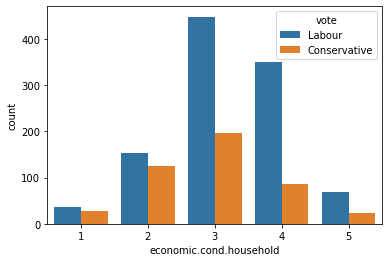

In [52]:
sns.countplot(data=df, x='economic.cond.household', hue='vote');

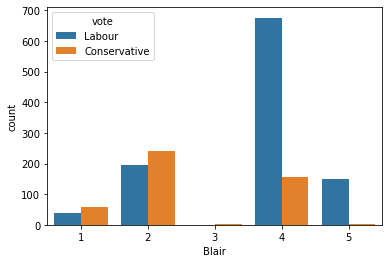

In [53]:
sns.countplot(data=df, x='Blair', hue='vote');

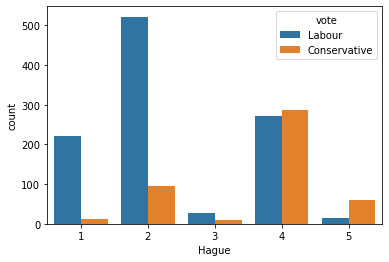

In [54]:
sns.countplot(data=df, x='Hague', hue='vote');

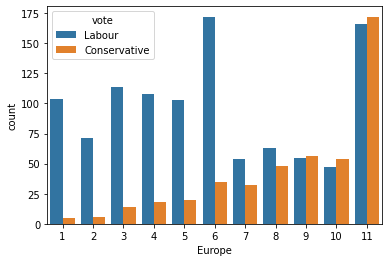

In [55]:
sns.countplot(data=df, x='Europe', hue='vote');

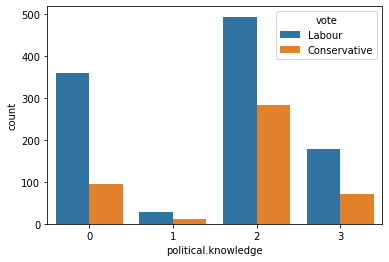

In [56]:
sns.countplot(data=df, x='political.knowledge', hue='vote');

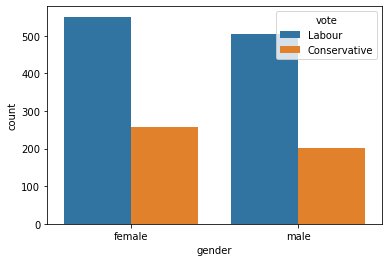

In [57]:
sns.countplot(data=df, x='gender', hue='vote');

Inference:
1. Labour gets the highest voting from both female and male voters.
2. Almost in all the categories Labour is getting the maximum votes.
3. Conservative gets a little bit high votes from Europe ‘11’.

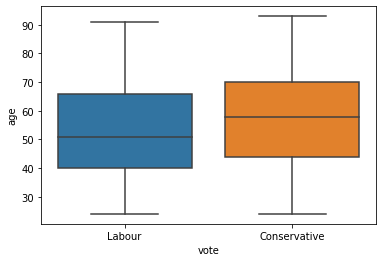

In [64]:
sns.boxplot(data=df, x='vote', y='age') ;

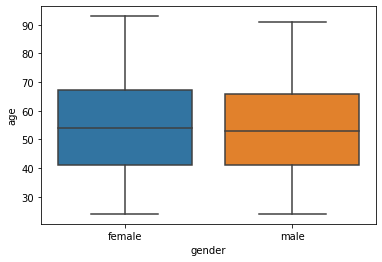

In [65]:
sns.boxplot(data=df, x='gender', y='age') ;

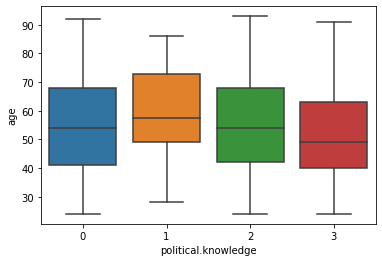

In [66]:
sns.boxplot(data=df, x='political.knowledge', y='age') ;

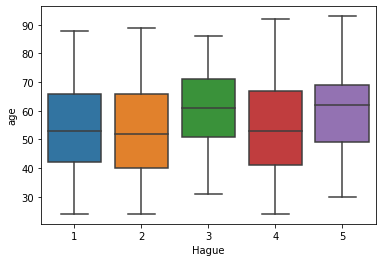

In [67]:
sns.boxplot(data=df, x='Hague', y='age') ;

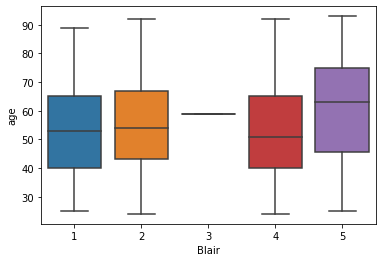

In [68]:
sns.boxplot(data=df, x='Blair', y='age') ;

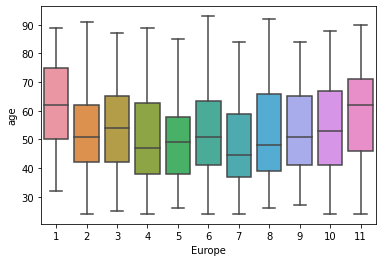

In [69]:
sns.boxplot(data=df, x='Europe', y='age') ;

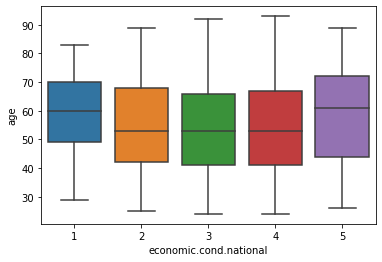

In [70]:
sns.boxplot(data=df, x='economic.cond.national', y='age') ;

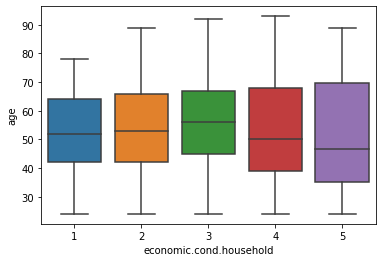

In [71]:
sns.boxplot(data=df, x='economic.cond.household', y='age') ;

Inference:
1. From the above all boxplots we could see people who vote Conservative are the people who are older.
2. In variable Europe ‘1’ are older people.

PairPlot

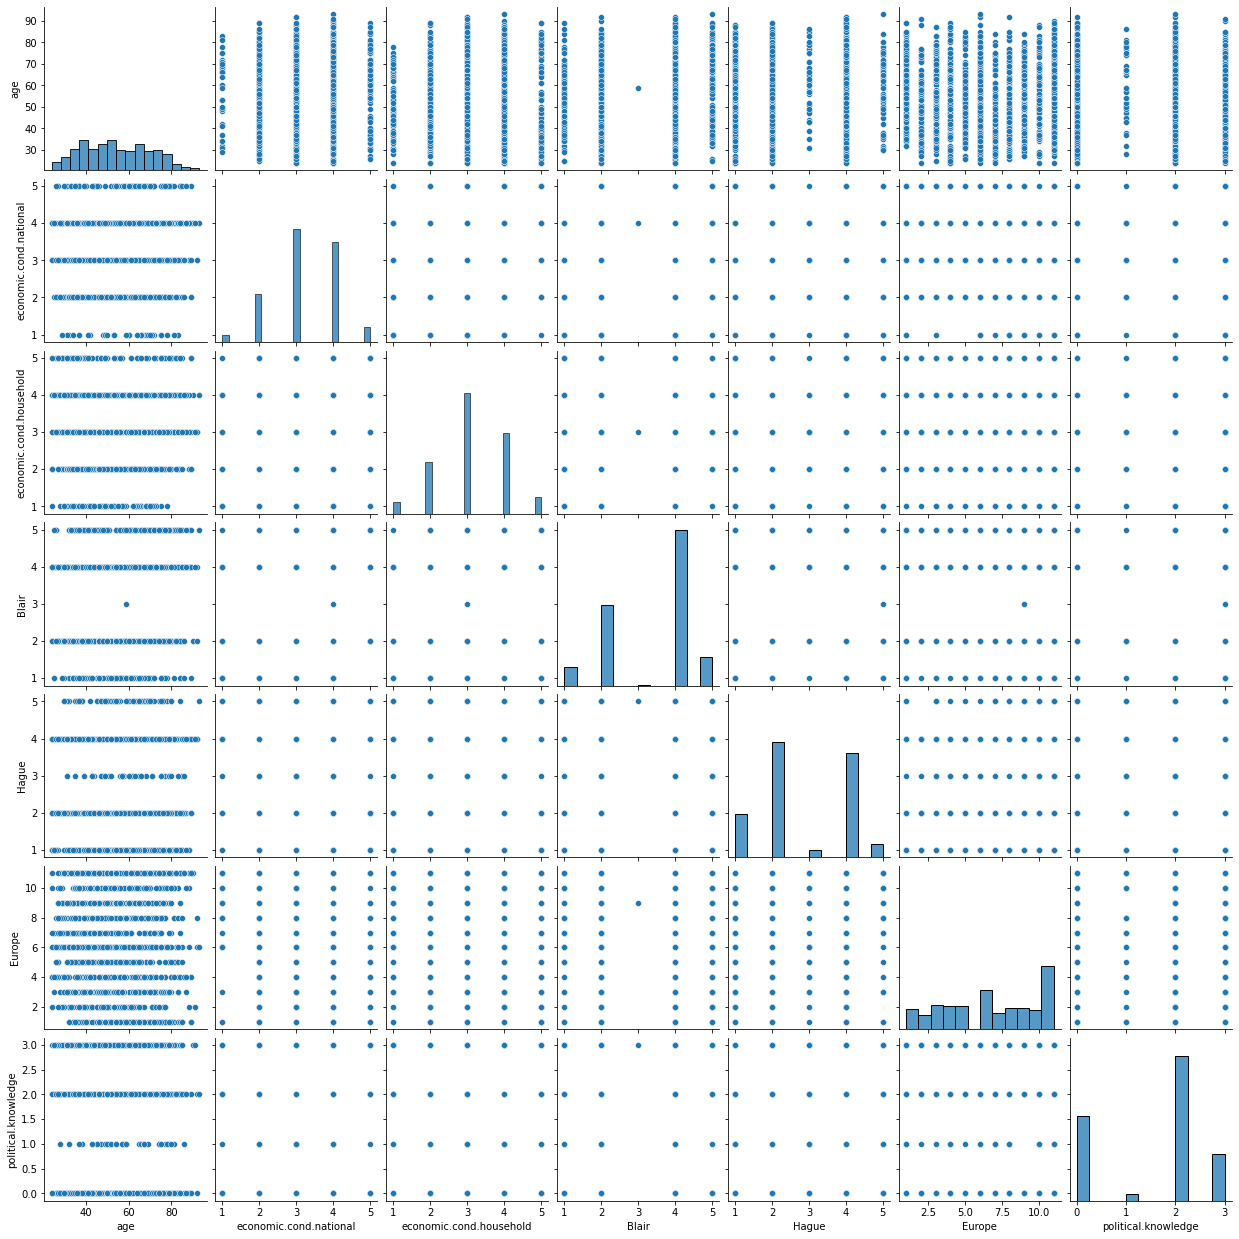

In [72]:
sns.pairplot(data=df)

Exploratory Data Analysis

In [33]:
#Basic information

df.info()

#Describe the data

df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   object
 3   economic.cond.household  1517 non-null   object
 4   Blair                    1517 non-null   object
 5   Hague                    1517 non-null   object
 6   Europe                   1517 non-null   object
 7   political.knowledge      1517 non-null   object
 8   gender                   1517 non-null   object
dtypes: int64(1), object(8)
memory usage: 150.8+ KB


,age
count,1517.000000
mean,54.241266
std,15.701741
min,24.000000
25%,41.000000
50%,53.000000
75%,67.000000
max,93.000000


In [34]:
#Find the duplicates

df.duplicated().sum()

0

In [35]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

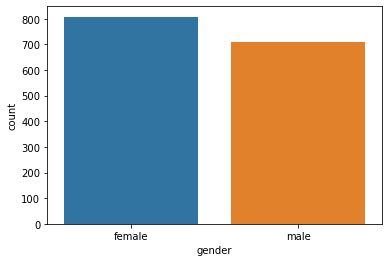

In [36]:
#Plot the unique values

sns.countplot(df['gender']).unique()

In [37]:
#Find null values

df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [38]:
#Datatypes

df.dtypes

vote                       object
age                         int64
economic.cond.national     object
economic.cond.household    object
Blair                      object
Hague                      object
Europe                     object
political.knowledge        object
gender                     object
dtype: object

In [39]:
#Filter data

df[df['Hague']==1].head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
7,Labour,77,3,4,4,1,1,0,male
9,Labour,70,3,2,5,1,11,2,male


In [40]:
#Correlation 

df.corr()

,age
age,1.0


In [41]:
#  Use the interquartile range (IQR) for checking outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]
print(outliers)

     vote  age economic.cond.national economic.cond.household Blair Hague  \
0     NaN  NaN                    NaN                     NaN   NaN   NaN   
1     NaN  NaN                    NaN                     NaN   NaN   NaN   
2     NaN  NaN                    NaN                     NaN   NaN   NaN   
3     NaN  NaN                    NaN                     NaN   NaN   NaN   
4     NaN  NaN                    NaN                     NaN   NaN   NaN   
...   ...  ...                    ...                     ...   ...   ...   
1520  NaN  NaN                    NaN                     NaN   NaN   NaN   
1521  NaN  NaN                    NaN                     NaN   NaN   NaN   
1522  NaN  NaN                    NaN                     NaN   NaN   NaN   
1523  NaN  NaN                    NaN                     NaN   NaN   NaN   
1524  NaN  NaN                    NaN                     NaN   NaN   NaN   

     Europe political.knowledge gender  
0       NaN                 NaN   

C:\Users\Dell\AppData\Local\Temp\ipykernel_9420\1599356206.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]


Inference:
1. Hague is the conservative leader.Most of the people fall under the category where they are highly Eurosceptic.Both the  parties have good knowledge of Europe's political culture.We see that the data is not normally distributed.Majority of    the participants are within 30 to 80 years of age.Age group of 45 to 50 years contribute to highest number of    participants.Out of 1525 persons, 600 participants rated the economic condition of nation as morethan average level.Out of 1525 persons, around 650 participants rated the economic condition of householdas more than average level out of which 1200 rated it on a higher scale.Around 55% of participants rated Blair at above average level and 65% rated him athigher level of assessment.Around 40% above average rating. Only 50 participants granted highest ratings.15.Around 67% of people are aware of party's position on Europe's integration and 21% ofpeople are unaware of party's position on Europe's integration.Around 63% are skeptical of European integration and 27% are have ultimate skepticism.
2. The variable age and vote are correlated to each other.Participants' Eurospectic sentiment has not influenced their assessment on economiccondition of nation or economic condition of household goods.When we draw the correlation heatmap, the below is what we get. This tells us that thereis no strong collinearity between the variables

### Data Preparation

### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

Encoding the dataset


In [42]:
df1 = pd.read_excel('Election_Data.xlsx',sheet_name = 'Election_Dataset_Two Classes')
#removing or dropping unwanted variable
df1.drop(columns = 'Unnamed: 0',inplace = True)
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


Inference:
The variables ‘vote’ and ‘gender’ have string values. Converting them into numeric values
for modelling.

In [43]:
for feature in df1.columns:
    if df1[feature].dtype == 'object':
        print('\n')
        print('Required Feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes
        



Required Feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


Required Feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [44]:
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [45]:
df1['gender'].astype('float')

0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
1520    1.0
1521    1.0
1522    1.0
1523    1.0
1524    0.0
Name: gender, Length: 1525, dtype: float64

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int8 
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 86.5 KB


Splitting the data into train and test

In [236]:
from sklearn.model_selection import train_test_split
#Predictor variables should be in X dataframe
X = df1.drop('vote',axis=1)
#Target varibales should be in y dataframe
y = df1[['vote']]

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

### Modelling:
### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [90]:
# Preprocess the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
# Create a logistic regression model
model1 = LogisticRegression()

In [92]:
# Fit the model to the training data
model1.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [93]:
# Make predictions on the training and test data
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

In [94]:
#train prediction
y_train_pred1

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [95]:
#test prediction
y_test_pred1

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [98]:
# Generate a confusion matrix for the training and test data
confusion_matrix_train1 = confusion_matrix(y_train, y_train_pred1)
confusion_matrix_test1 = confusion_matrix(y_test, y_test_pred1)

In [99]:
# train confusion matrix
confusion_matrix_train1

array([[229, 103],
       [ 68, 667]], dtype=int64)

In [100]:
#test confusion matrix
confusion_matrix_test1

array([[ 85,  45],
       [ 36, 292]], dtype=int64)

In [101]:
# Compute the accuracy score for the training and test data
accuracy_train1 = accuracy_score(y_train, y_train_pred1)
accuracy_test1 = accuracy_score(y_test, y_test_pred1)

In [102]:
#train accuracy score
accuracy_train1

0.8397375820056232

In [103]:
#test accuracy score
accuracy_test1

0.8231441048034934

In [111]:
# Generate a classification report for the training and test data
classification_report_train1 = classification_report(y_train, y_train_pred1)
classification_report_test1 = classification_report(y_test, y_test_pred1)

In [112]:
#train classification report
classification_report_train1

'              precision    recall  f1-score   support\n\n           0       0.77      0.69      0.73       332\n           1       0.87      0.91      0.89       735\n\n    accuracy                           0.84      1067\n   macro avg       0.82      0.80      0.81      1067\nweighted avg       0.84      0.84      0.84      1067\n'

In [113]:
#test classification report
classification_report_test1

'              precision    recall  f1-score   support\n\n           0       0.70      0.65      0.68       130\n           1       0.87      0.89      0.88       328\n\n    accuracy                           0.82       458\n   macro avg       0.78      0.77      0.78       458\nweighted avg       0.82      0.82      0.82       458\n'

Inference:
1. The model is not overfitting or underfitting. 
2. Training and Testing results shows that the model is excellent with good precision and recall values.

LDA (linear discriminant analysis). 

In [116]:
#Applying LDA and fitting the training data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
# Create an LDA model
model2 = LinearDiscriminantAnalysis()

In [117]:
# Fit the model to the training data
model2.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [118]:
# Make predictions on the training and test data
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

In [119]:
#prediction on train
y_train_pred2

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [120]:
#prediction on test
y_test_pred2

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [121]:
# Generate a confusion matrix for the training and test data
confusion_matrix_train2 = confusion_matrix(y_train, y_train_pred2)
confusion_matrix_test2 = confusion_matrix(y_test, y_test_pred2)

In [122]:
#confusion matrix for train 
confusion_matrix_train2

array([[233,  99],
       [ 75, 660]], dtype=int64)

In [123]:
#confusion matrix for test 
confusion_matrix_test2

array([[ 86,  44],
       [ 39, 289]], dtype=int64)

In [124]:
# Compute the accuracy score for the training and test data
accuracy_train2 = accuracy_score(y_train, y_train_pred2)
accuracy_test2 = accuracy_score(y_test, y_test_pred2)

In [125]:
#accuracy score for train
accuracy_train2

0.8369259606373008

In [126]:
#accuracy score for test
accuracy_test2

0.8187772925764192

In [127]:
# Generate a classification report for the training and test data
classification_report_train2 = classification_report(y_train, y_train_pred2)
classification_report_test2 = classification_report(y_test, y_test_pred2)

In [128]:
#classification report for train
classification_report_train2

'              precision    recall  f1-score   support\n\n           0       0.76      0.70      0.73       332\n           1       0.87      0.90      0.88       735\n\n    accuracy                           0.84      1067\n   macro avg       0.81      0.80      0.81      1067\nweighted avg       0.83      0.84      0.84      1067\n'

In [129]:
#classification report for test
classification_report_test2

'              precision    recall  f1-score   support\n\n           0       0.69      0.66      0.67       130\n           1       0.87      0.88      0.87       328\n\n    accuracy                           0.82       458\n   macro avg       0.78      0.77      0.77       458\nweighted avg       0.82      0.82      0.82       458\n'

Inference:
1. Training and Testing results shows that the model is excellent with good precision and recall
values.
2. The LDA model is better than Logistic regression with better Test accuracy and recall values.

### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results

KNN

In [132]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN model
model3 = KNeighborsClassifier()

In [133]:
# Fit the model to the training data
model3.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [134]:
# Make predictions on the training and test data
y_train_pred3 = model3.predict(X_train)
y_test_pred3 = model3.predict(X_test)

In [135]:
#prediction on train
y_train_pred3

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [136]:
#prediction on test
y_test_pred3

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [137]:
# Generate a confusion matrix for the training and test data
confusion_matrix_train3 = confusion_matrix(y_train, y_train_pred3)
confusion_matrix_test3 = confusion_matrix(y_test, y_test_pred3)

In [138]:
#confusion matrix for train 
confusion_matrix_train3

array([[248,  84],
       [ 62, 673]], dtype=int64)

In [139]:
#confusion matrix for test 
confusion_matrix_test3

array([[ 92,  38],
       [ 42, 286]], dtype=int64)

In [140]:
# Compute the accuracy score for the training and test data
accuracy_train3 = accuracy_score(y_train, y_train_pred3)
accuracy_test3 = accuracy_score(y_test, y_test_pred3)

In [141]:
#accuracy score for train
accuracy_train3

0.8631677600749765

In [142]:
#accuracy score for test
accuracy_test3

0.8253275109170306

In [143]:
# Generate a classification report for the training and test data
classification_report_train3 = classification_report(y_train, y_train_pred3)
classification_report_test3 = classification_report(y_test, y_test_pred3)

In [144]:
#classification report for train
classification_report_train3

'              precision    recall  f1-score   support\n\n           0       0.80      0.75      0.77       332\n           1       0.89      0.92      0.90       735\n\n    accuracy                           0.86      1067\n   macro avg       0.84      0.83      0.84      1067\nweighted avg       0.86      0.86      0.86      1067\n'

In [145]:
#classification report for test
classification_report_test3

'              precision    recall  f1-score   support\n\n           0       0.69      0.71      0.70       130\n           1       0.88      0.87      0.88       328\n\n    accuracy                           0.83       458\n   macro avg       0.78      0.79      0.79       458\nweighted avg       0.83      0.83      0.83       458\n'

Naive Bayes

In [148]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
model4 = GaussianNB()

# Fit the classifier to the training data
model4.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [149]:
# Make predictions on the training and test data
y_train_pred4 = model4.predict(X_train)
y_test_pred4 = model4.predict(X_test)

In [150]:
#prediction on train
y_train_pred4

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [151]:
#prediction on test
y_test_pred4

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [152]:
# Generate a confusion matrix for the training and test data
confusion_matrix_train4 = confusion_matrix(y_train, y_train_pred4)
confusion_matrix_test4 = confusion_matrix(y_test, y_test_pred4)

In [153]:
#confusion matrix for train 
confusion_matrix_train4

array([[240,  92],
       [ 86, 649]], dtype=int64)

In [154]:
#confusion matrix for test 
confusion_matrix_test4

array([[ 94,  36],
       [ 44, 284]], dtype=int64)

In [155]:
# Compute the accuracy score for the training and test data
accuracy_train4 = accuracy_score(y_train, y_train_pred4)
accuracy_test4 = accuracy_score(y_test, y_test_pred4)

In [156]:
#accuracy score for train
accuracy_train4

0.8331771321462043

In [157]:
#accuracy score for test
accuracy_test4

0.8253275109170306

In [158]:
# Generate a classification report for the training and test data
classification_report_train4 = classification_report(y_train, y_train_pred4)
classification_report_test4 = classification_report(y_test, y_test_pred4)

In [159]:
#classification report for train
classification_report_train4

'              precision    recall  f1-score   support\n\n           0       0.74      0.72      0.73       332\n           1       0.88      0.88      0.88       735\n\n    accuracy                           0.83      1067\n   macro avg       0.81      0.80      0.80      1067\nweighted avg       0.83      0.83      0.83      1067\n'

In [160]:
#classification report for test
classification_report_test4

'              precision    recall  f1-score   support\n\n           0       0.68      0.72      0.70       130\n           1       0.89      0.87      0.88       328\n\n    accuracy                           0.83       458\n   macro avg       0.78      0.79      0.79       458\nweighted avg       0.83      0.83      0.83       458\n'

Inference:
1. Training and Testing results shows that the model neither overfitting nor underfitting.
2. The Naive Bayes model also performs well with better accuracy and recall values.
3. Even though NB and KNN have same Train and Test accuracy. Based on their recall value in test dataset it is evident that KNN performs better than Naive Bayes.

### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

Model Tuning

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [184]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Tune the model using grid search
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}
model5 = GridSearchCV(model, param_grid, cv=5)
model5.fit(X_train, y_train)



C:\Users\Dell\AppData\Local\Temp\ipykernel_9420\1383722640.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [185]:
# Make predictions on the training and test data
y_train_pred5 = model5.predict(X_train)
y_test_pred5 = model5.predict(X_test)

In [186]:
#prediction on train
y_train_pred5

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [187]:
#prediction on test
y_test_pred5

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [188]:
# Compute the accuracy score for the training and test data
accuracy_train5 = accuracy_score(y_train, y_train_pred5)
accuracy_test5 = accuracy_score(y_test, y_test_pred5)

In [190]:
accuracy_train5

0.8650421743205249

In [191]:
accuracy_test5

0.834061135371179

In [192]:
# Generate a confusion matrix for the training and test data
confusion_matrix_train5 = confusion_matrix(y_train, y_train_pred5)
confusion_matrix_test5 = confusion_matrix(y_test, y_test_pred5)

In [193]:
#train confusion matrix
confusion_matrix_train5

array([[237,  95],
       [ 49, 686]], dtype=int64)

In [194]:
#test confusion matrix
confusion_matrix_test5

array([[ 87,  43],
       [ 33, 295]], dtype=int64)

In [195]:
# Generate a classification report for the training and test data
classification_report_train5 = classification_report(y_train, y_train_pred5)
classification_report_test5 = classification_report(y_test, y_test_pred5)

In [196]:
#train classification report
classification_report_train5

'              precision    recall  f1-score   support\n\n           0       0.83      0.71      0.77       332\n           1       0.88      0.93      0.91       735\n\n    accuracy                           0.87      1067\n   macro avg       0.85      0.82      0.84      1067\nweighted avg       0.86      0.87      0.86      1067\n'

In [197]:
#test classification report
classification_report_test5

'              precision    recall  f1-score   support\n\n           0       0.72      0.67      0.70       130\n           1       0.87      0.90      0.89       328\n\n    accuracy                           0.83       458\n   macro avg       0.80      0.78      0.79       458\nweighted avg       0.83      0.83      0.83       458\n'

Bagging

In [200]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Set up the base classifier
base_classifier = RandomForestClassifier(n_estimators=10, random_state=0)

# Set up the bagging classifier
model6 = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=0)

# Fit the bagging classifier to the training data
model6.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=10,
                                                        random_state=0),
                  random_state=0)

In [201]:
# Make predictions on the training and test data
y_train_pred6 = model6.predict(X_train)
y_test_pred6 = model6.predict(X_test)

In [202]:
#train prediction
y_train_pred6

array([1, 0, 1, ..., 1, 1, 1], dtype=int8)

In [203]:
#Test prediction
y_test_pred6

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,

In [204]:
# Generate a confusion matrix for the training and test data
confusion_matrix_train6 = confusion_matrix(y_train, y_train_pred6)
confusion_matrix_test6 = confusion_matrix(y_test, y_test_pred6)

In [205]:
#train confusion matrix
confusion_matrix_train6

array([[297,  35],
       [ 12, 723]], dtype=int64)

In [206]:
#test confusion matrix
confusion_matrix_test6

array([[ 90,  40],
       [ 38, 290]], dtype=int64)

In [207]:
# Compute the accuracy score for the training and test data
accuracy_train6 = accuracy_score(y_train, y_train_pred6)
accuracy_test6 = accuracy_score(y_test, y_test_pred6)

In [208]:
#train accuracy score
accuracy_train6

0.9559512652296157

In [209]:
#test accuracy score
accuracy_test6

0.8296943231441049

In [210]:
# Generate a classification report for the training and test data
classification_report_train6 = classification_report(y_train, y_train_pred6)
classification_report_test6 = classification_report(y_test, y_test_pred6)

In [211]:
#train classification report
classification_report_train6

'              precision    recall  f1-score   support\n\n           0       0.96      0.89      0.93       332\n           1       0.95      0.98      0.97       735\n\n    accuracy                           0.96      1067\n   macro avg       0.96      0.94      0.95      1067\nweighted avg       0.96      0.96      0.96      1067\n'

In [212]:
#test classification report
classification_report_test6

'              precision    recall  f1-score   support\n\n           0       0.70      0.69      0.70       130\n           1       0.88      0.88      0.88       328\n\n    accuracy                           0.83       458\n   macro avg       0.79      0.79      0.79       458\nweighted avg       0.83      0.83      0.83       458\n'

Boosting

In [215]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [216]:
# Create the base classifier
base_clf = DecisionTreeClassifier(max_depth=1)

# Create the AdaBoost classifier
model7 = AdaBoostClassifier(base_estimator=base_clf, n_estimators=100, random_state=42)


In [217]:
# Fit the classifier to the training data
model7.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [218]:
# Make predictions on the training and test data
y_train_pred7 = model7.predict(X_train)
y_test_pred7 = model7.predict(X_test)

In [219]:
#train prediction
y_train_pred7

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [220]:
#test prediction
y_test_pred7

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [221]:
# Generate a confusion matrix for the training and test data
confusion_matrix_train7 = confusion_matrix(y_train, y_train_pred7)
confusion_matrix_test7 = confusion_matrix(y_test, y_test_pred7)

In [222]:
#train confusion matrix
confusion_matrix_train7

array([[238,  94],
       [ 69, 666]], dtype=int64)

In [223]:
#test confusion matrix
confusion_matrix_test7

array([[ 90,  40],
       [ 43, 285]], dtype=int64)

In [224]:
# Compute the accuracy score for the training and test data
accuracy_train7 = accuracy_score(y_train, y_train_pred7)
accuracy_test7 = accuracy_score(y_test, y_test_pred7)

In [225]:
#train accuracy score
accuracy_train7

0.8472352389878163

In [226]:
#test accuracy score
accuracy_test7

0.8187772925764192

In [227]:
# Generate a classification report for the training and test data
classification_report_train7 = classification_report(y_train, y_train_pred7)
classification_report_test7 = classification_report(y_test, y_test_pred7)

In [228]:
#train classification report
classification_report_train7

'              precision    recall  f1-score   support\n\n           0       0.78      0.72      0.74       332\n           1       0.88      0.91      0.89       735\n\n    accuracy                           0.85      1067\n   macro avg       0.83      0.81      0.82      1067\nweighted avg       0.84      0.85      0.85      1067\n'

In [229]:
#test classification report
classification_report_test7

'              precision    recall  f1-score   support\n\n           0       0.68      0.69      0.68       130\n           1       0.88      0.87      0.87       328\n\n    accuracy                           0.82       458\n   macro avg       0.78      0.78      0.78       458\nweighted avg       0.82      0.82      0.82       458\n'

In [88]:
#applying grid search cv for ada boost classifier
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }


DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')
grid_search_ABC

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='auto',
                                                                                max_features='auto',
                                                                                random_state=11)),
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'n_estimators': [1, 2]},
             scoring='roc_auc')

### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

Logistic Regression 

In [114]:
print("Train set of Logistic Regression:")
print("Accuary Score: ",accuracy_train1)
print("Confusion Matrix: ",confusion_matrix_train1)
print("Classification Report",classification_report_train1)
print("Test set of Logistic Regression")
print("Accuary Score: ",accuracy_test1)
print("Confusion Matrix",confusion_matrix_test1)
print("Classification Report",classification_report_test1)

Train set of Logistic Regression:
Accuary Score:  0.8397375820056232
Confusion Matrix:  [[229 103]
 [ 68 667]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067

Test set of Logistic Regression
Accuary Score:  0.8231441048034934
Confusion Matrix [[ 85  45]
 [ 36 292]]
Classification Report               precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



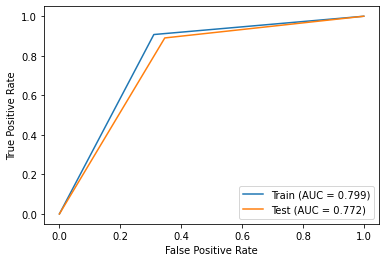

In [115]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
# Compute the AUC score for the train set
auc_train = roc_auc_score(y_train, y_train_pred1)
# Compute the AUC score for the test set
auc_test = roc_auc_score(y_test, y_test_pred1)

# Compute the false positive rate and true positive rate for the train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred1)

# Compute the false positive rate and true positive rate for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred1)

# Plot the ROC curve for the train set
plt.plot(fpr_train, tpr_train, label="Train (AUC = {:.3f})".format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label="Test (AUC = {:.3f})".format(auc_test))

# Add labels and a legend to the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Show the plot
plt.show()

LDA

In [130]:
print("Train set of LDA:")
print("Accuary Score: ",accuracy_train2)
print("Confusion Matrix: ",confusion_matrix_train2)
print("Classification Report",classification_report_train2)
print("Test set of LDA:")
print("Accuary Score: ",accuracy_test2)
print("Confusion Matrix",confusion_matrix_test2)
print("Classification Report",classification_report_test2)

Train set of LDA:
Accuary Score:  0.8369259606373008
Confusion Matrix:  [[233  99]
 [ 75 660]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067

Test set of LDA:
Accuary Score:  0.8187772925764192
Confusion Matrix [[ 86  44]
 [ 39 289]]
Classification Report               precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



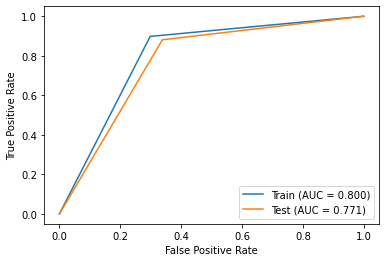

In [131]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
# Compute the AUC score for the train set
auc_train = roc_auc_score(y_train, y_train_pred2)
# Compute the AUC score for the test set
auc_test = roc_auc_score(y_test, y_test_pred2)

# Compute the false positive rate and true positive rate for the train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred2)

# Compute the false positive rate and true positive rate for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred2)

# Plot the ROC curve for the train set
plt.plot(fpr_train, tpr_train, label="Train (AUC = {:.3f})".format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label="Test (AUC = {:.3f})".format(auc_test))

# Add labels and a legend to the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Show the plot
plt.show()

KNN

In [146]:
print("Train set of KNN:")
print("Accuary Score: ",accuracy_train3)
print("Confusion Matrix: ",confusion_matrix_train3)
print("Classification Report",classification_report_train3)
print("Test set of KNN:")
print("Accuary Score: ",accuracy_test3)
print("Confusion Matrix",confusion_matrix_test3)
print("Classification Report",classification_report_test3)

Train set of KNN:
Accuary Score:  0.8631677600749765
Confusion Matrix:  [[248  84]
 [ 62 673]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.75      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067

Test set of KNN:
Accuary Score:  0.8253275109170306
Confusion Matrix [[ 92  38]
 [ 42 286]]
Classification Report               precision    recall  f1-score   support

           0       0.69      0.71      0.70       130
           1       0.88      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



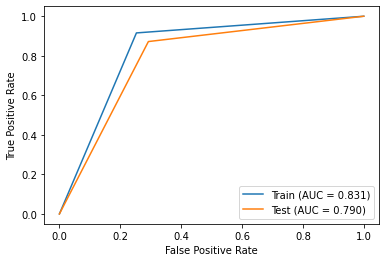

In [147]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
# Compute the AUC score for the train set
auc_train = roc_auc_score(y_train, y_train_pred3)
# Compute the AUC score for the test set
auc_test = roc_auc_score(y_test, y_test_pred3)

# Compute the false positive rate and true positive rate for the train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred3)

# Compute the false positive rate and true positive rate for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred3)

# Plot the ROC curve for the train set
plt.plot(fpr_train, tpr_train, label="Train (AUC = {:.3f})".format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label="Test (AUC = {:.3f})".format(auc_test))

# Add labels and a legend to the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Show the plot
plt.show()

Naive Bayes

In [161]:
print("Train set of Naive Bayes:")
print("Accuary Score: ",accuracy_train4)
print("Confusion Matrix: ",confusion_matrix_train4)
print("Classification Report",classification_report_train4)
print("Test set of Naive Bayes:")
print("Accuary Score: ",accuracy_test4)
print("Confusion Matrix",confusion_matrix_test4)
print("Classification Report",classification_report_test4)

Train set of Naive Bayes:
Accuary Score:  0.8331771321462043
Confusion Matrix:  [[240  92]
 [ 86 649]]
Classification Report               precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067

Test set of Naive Bayes:
Accuary Score:  0.8253275109170306
Confusion Matrix [[ 94  36]
 [ 44 284]]
Classification Report               precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



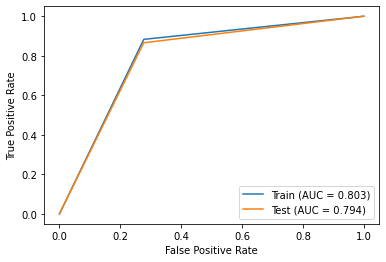

In [162]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
# Compute the AUC score for the train set
auc_train = roc_auc_score(y_train, y_train_pred4)
# Compute the AUC score for the test set
auc_test = roc_auc_score(y_test, y_test_pred4)

# Compute the false positive rate and true positive rate for the train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred4)

# Compute the false positive rate and true positive rate for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred4)

# Plot the ROC curve for the train set
plt.plot(fpr_train, tpr_train, label="Train (AUC = {:.3f})".format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label="Test (AUC = {:.3f})".format(auc_test))

# Add labels and a legend to the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Show the plot
plt.show()

Model Tuning

In [198]:
print("Train set of Model Tuning:")
print("Accuary Score: ",accuracy_train5)
print("Confusion Matrix: ",confusion_matrix_train5)
print("Classification Report",classification_report_train5)
print("Test set of Model Tuning:")
print("Accuary Score: ",accuracy_test5)
print("Confusion Matrix",confusion_matrix_test5)
print("Classification Report",classification_report_test5)

Train set of Model Tuning:
Accuary Score:  0.8650421743205249
Confusion Matrix:  [[237  95]
 [ 49 686]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.71      0.77       332
           1       0.88      0.93      0.91       735

    accuracy                           0.87      1067
   macro avg       0.85      0.82      0.84      1067
weighted avg       0.86      0.87      0.86      1067

Test set of Model Tuning:
Accuary Score:  0.834061135371179
Confusion Matrix [[ 87  43]
 [ 33 295]]
Classification Report               precision    recall  f1-score   support

           0       0.72      0.67      0.70       130
           1       0.87      0.90      0.89       328

    accuracy                           0.83       458
   macro avg       0.80      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458



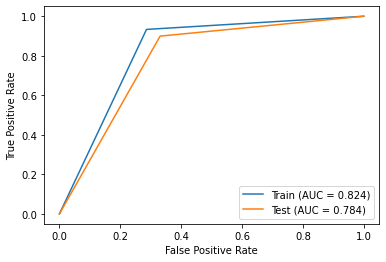

In [199]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
# Compute the AUC score for the train set
auc_train = roc_auc_score(y_train, y_train_pred5)
# Compute the AUC score for the test set
auc_test = roc_auc_score(y_test, y_test_pred5)

# Compute the false positive rate and true positive rate for the train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred5)

# Compute the false positive rate and true positive rate for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred5)

# Plot the ROC curve for the train set
plt.plot(fpr_train, tpr_train, label="Train (AUC = {:.3f})".format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label="Test (AUC = {:.3f})".format(auc_test))

# Add labels and a legend to the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Show the plot
plt.show()

Bagging

In [213]:
print("Train set of Bagging:")
print("Accuary Score: ",accuracy_train6)
print("Confusion Matrix: ",confusion_matrix_train6)
print("Classification Report",classification_report_train6)
print("Test set of Bagging:")
print("Accuary Score: ",accuracy_test6)
print("Confusion Matrix",confusion_matrix_test6)
print("Classification Report",classification_report_test6)

Train set of Bagging:
Accuary Score:  0.9559512652296157
Confusion Matrix:  [[297  35]
 [ 12 723]]
Classification Report               precision    recall  f1-score   support

           0       0.96      0.89      0.93       332
           1       0.95      0.98      0.97       735

    accuracy                           0.96      1067
   macro avg       0.96      0.94      0.95      1067
weighted avg       0.96      0.96      0.96      1067

Test set of Bagging:
Accuary Score:  0.8296943231441049
Confusion Matrix [[ 90  40]
 [ 38 290]]
Classification Report               precision    recall  f1-score   support

           0       0.70      0.69      0.70       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



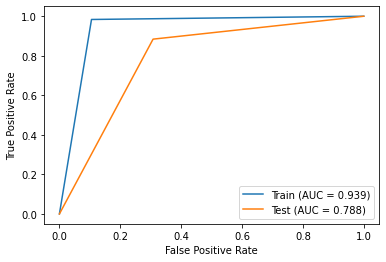

In [214]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
# Compute the AUC score for the train set
auc_train = roc_auc_score(y_train, y_train_pred6)
# Compute the AUC score for the test set
auc_test = roc_auc_score(y_test, y_test_pred6)

# Compute the false positive rate and true positive rate for the train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred6)

# Compute the false positive rate and true positive rate for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred6)

# Plot the ROC curve for the train set
plt.plot(fpr_train, tpr_train, label="Train (AUC = {:.3f})".format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label="Test (AUC = {:.3f})".format(auc_test))

# Add labels and a legend to the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Show the plot
plt.show()

Boosting

In [230]:
print("Train set of Boosting:")
print("Accuary Score: ",accuracy_train7)
print("Confusion Matrix: ",confusion_matrix_train7)
print("Classification Report",classification_report_train7)
print("Test set of Boosting:")
print("Accuary Score: ",accuracy_test7)
print("Confusion Matrix",confusion_matrix_test7)
print("Classification Report",classification_report_test7)

Train set of Boosting:
Accuary Score:  0.8472352389878163
Confusion Matrix:  [[238  94]
 [ 69 666]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067

Test set of Boosting:
Accuary Score:  0.8187772925764192
Confusion Matrix [[ 90  40]
 [ 43 285]]
Classification Report               precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



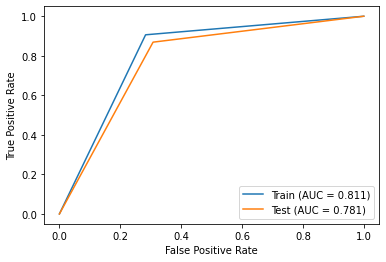

In [231]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
# Compute the AUC score for the train set
auc_train = roc_auc_score(y_train, y_train_pred7)
# Compute the AUC score for the test set
auc_test = roc_auc_score(y_test, y_test_pred7)

# Compute the false positive rate and true positive rate for the train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred7)

# Compute the false positive rate and true positive rate for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred7)

# Plot the ROC curve for the train set
plt.plot(fpr_train, tpr_train, label="Train (AUC = {:.3f})".format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label="Test (AUC = {:.3f})".format(auc_test))

# Add labels and a legend to the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Show the plot
plt.show()

Inference for Best Model:
1. Bagging model performs the best with 95% train accuracy. And also have 96% precision and above 90% recall which is better than any other models that we have performed in here with the Election dataset. 
2. Rest all the models are more or less have same accuracy of 89% 

### 1.8 Based on these predictions, what are the insights? 

1. Dataset has 10 variables. Unnamed: 0 is serial number so we can drop that.
2. We see that variable vote and gender contain string value . We know that modelling can not take string value.To perform the analysis , we will be converting string value to integer data type . 
3. Age refers to the person who have entered/ gained voting rights.The maximum economic condition of the nation falls      under the moderate category.The maximum economic condition of the household goods falls under the moderate category.Blair is the labour leader.
4. Model score for all the models seem to be similar for both the training and the testsets.AUC scores is also same for almost all the models.From the confusion matrix, we see that actual and predicted data are very close toeach other. This is the sign of right fit model4.We see even the F1 scores are almost same on all the models.Bagging and boosting gave out excellent results proving there is no overfitting orunderfitting.We see that Tuning the model has optimized the results for the training set and hencewe can consider this for ADA Boost.As per the models, and the best case scenario given accuracy of more than 83%, we can saythat in between 57 to 59%  of seats are reserved for Labour party.
5. In the worst case scenario, given accuracy of more than 82%, a minimum of in between 56 to 58% of seats are reserved for the Conservative Party.Considering other variables, in the model, we can say that there are multiple fence sitters who can vote for either of the parties by getting influenced from variousvariables in action.Out of voters choosing labour party, more than 50% are female and less than 49%% are male. Labour party can see to increase influence on males to increase its vote bank.

## Problem 2:

### In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

### President Franklin D. Roosevelt in 1941
### President John F. Kennedy in 1961
### President Richard Nixon in 1973

### 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [13]:
from nltk.corpus import inaugural

In [14]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [15]:
# Create a list of tuples, each containing the name of a speech and the corresponding file name
speeches = [('Franklin D. Roosevelt', '1941-Roosevelt.txt'),
            ('John F. Kennedy', '1961-Kennedy.txt'),
            ('Richard Nixon', '1973-Nixon.txt')]

# Print the table header
print("{:20s} {:>10s} {:>10s} {:>10s}".format("Speech", "Chars", "Words", "Sentences"))

# Print a row for each speech
for name, file in speeches:
    speech = inaugural.raw(file)
    words = inaugural.words(file)
    sents = inaugural.sents(file)
    print("{:20s} {:10d} {:10d} {:10d}".format(name, len(speech), len(words), len(sents)))

Speech                    Chars      Words  Sentences
Franklin D. Roosevelt       7571       1536         68
John F. Kennedy            7618       1546         52
Richard Nixon              9991       2028         69


### 2.2 Remove all the stopwords from all three speeches.

In [25]:
FDR = inaugural.words('1941-Roosevelt.txt')
JFK = inaugural.words('1961-Kennedy.txt')
RNX = inaugural.words('1973-Nixon.txt')

In [26]:
import re 
import string 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = set(stopwords.words('english')+list(string.punctuation))
def remove_stopwords(array,stopwords):
    filtered = []
    for a in array:
        al = a.lower()
        if al not in stopwords and a!='--':
            filtered.append(al)
    return filtered
FDR_clean = remove_stopwords(FDR,stopwords)
JFK_clean = remove_stopwords(JFK,stopwords)
RNX_clean = remove_stopwords(RNX,stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
print("Number of words in Speech of President Franklin D. Roosevelt in 1941-after removal of stopwords are",len(FDR_clean))
print("Number of words in Speech of President John F. Kennedy in 1961-after removal of stopwords are",len(JFK_clean))
print("Number of words in Speech of President Richard Nixon in 1973-after removal of stopwords are",len(RNX_clean))

Number of words in Speech of President Franklin D. Roosevelt in 1941-after removal of stopwords are 632
Number of words in Speech of President John F. Kennedy in 1961-after removal of stopwords are 697
Number of words in Speech of President Richard Nixon in 1973-after removal of stopwords are 836


### 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) 

In [28]:
nltk.download('punkt')
from collections import Counter
# Word occurs the most number of times
def highest3words(array):
    Ctr = Counter(array)
    most_occur = Ctr.most_common(1)
    return most_occur

print("Top word which occured the most number of times in inaugural address of President Franklin D. Roosevelt in 1941 is", highest3words(FDR_clean))
print("Top word which occured the most number of times in inaugural address of President John F. Kennedy in 1961 is", highest3words(JFK_clean))
print("Top word which occured the most number of times in inaugural address of President Richard Nixon in 1973 is", highest3words(RNX_clean))

Top word which occured the most number of times in inaugural address of President Franklin D. Roosevelt in 1941 is [('nation', 12)]
Top word which occured the most number of times in inaugural address of President John F. Kennedy in 1961 is [('let', 16)]
Top word which occured the most number of times in inaugural address of President Richard Nixon in 1973 is [('us', 26)]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
# Mention the top three words.
def highestthreewords (array):
    Ctr = Counter(array)
    most_occur = Ctr.most_common(3)
    return most_occur
print("Top 3 words which occured the most number of times in inaugural address of President Franklin D. Roosevelt in 1941 is", highestthreewords(FDR_clean))
print("Top 3 words which occured the most number of times in inaugural address of President John F. Kennedy in 1961 is", highestthreewords(JFK_clean))
print("Top 3 words which occured the most number of times in inaugural address of President Richard Nixon in 1973 is", highestthreewords(RNX_clean))

Top 3 words which occured the most number of times in inaugural address of President Franklin D. Roosevelt in 1941 is [('nation', 12), ('know', 10), ('spirit', 9)]
Top 3 words which occured the most number of times in inaugural address of President John F. Kennedy in 1961 is [('let', 16), ('us', 12), ('world', 8)]
Top 3 words which occured the most number of times in inaugural address of President Richard Nixon in 1973 is [('us', 26), ('let', 22), ('america', 21)]


### 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) 

In [30]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [33]:
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib
# Word Cloud
from wordcloud import WordCloud
def word_cloud(w):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(w)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

Word Cloud for President Franklin D. Roosevelt speech in 1941


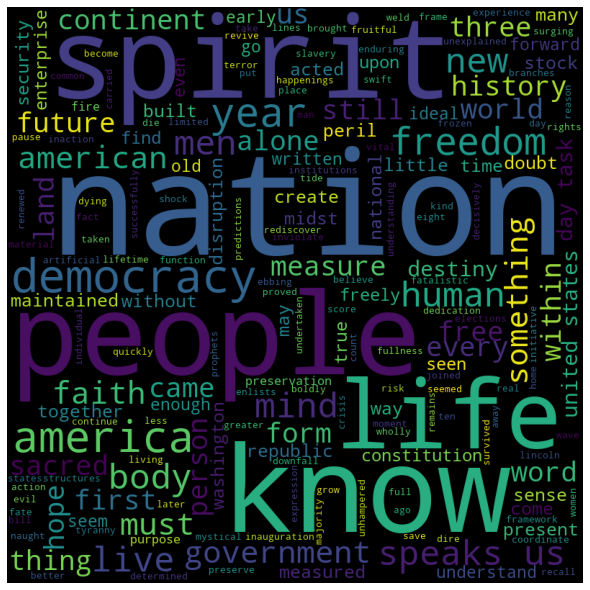

In [34]:
# Word Cloud for President Franklin D. Roosevelt speech in 1941
print('Word Cloud for President Franklin D. Roosevelt speech in 1941')
word_cloud((" ").join(FDR_clean))

Word Cloud for President John F. Kennedy speech in 1961


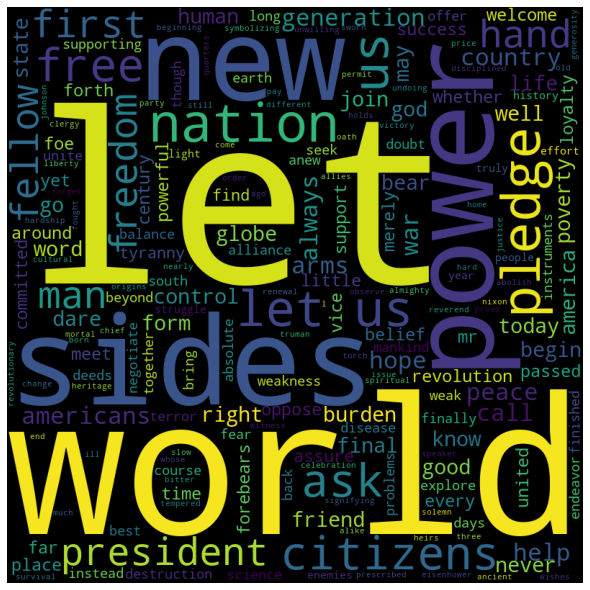

In [36]:
# Word Cloud for President John F. Kennedy speech in 1961
print('Word Cloud for President John F. Kennedy speech in 1961')
word_cloud((" ").join(JFK_clean))

Word Cloud for President Richard Nixon speech in 1973


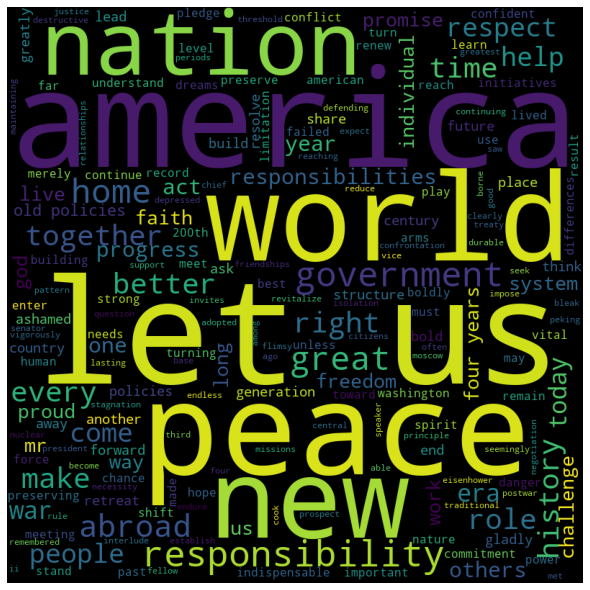

In [35]:
# Word Cloud for President Richard Nixon speech in 1973
print('Word Cloud for President Richard Nixon speech in 1973')
word_cloud((" ").join(RNX_clean))